# Geospatial data analysis: Zomato Bengaluru case study

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('zomato.csv')

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.shape

(51717, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [8]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [9]:
features = [i for i in df.columns if df[i].isnull().sum()>0]

In [10]:
features

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [11]:
for feature in features:
    print('{} column has {}% missing values'.format(feature,round(df[feature].isnull().sum()/len(df)*100,4)))

rate column has 15.0337% missing values
phone column has 2.3358% missing values
location column has 0.0406% missing values
rest_type column has 0.4389% missing values
dish_liked column has 54.2916% missing values
cuisines column has 0.087% missing values
approx_cost(for two people) column has 0.669% missing values


In [12]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

# Drop the restaurants whose rating is not available:

In [13]:
df.dropna(axis=0, subset=['rate'], inplace=True)

In [14]:
df.shape

(43942, 17)

In [15]:
df['rate'] = list(map(lambda x:x[:3],df['rate']))

In [16]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3', '-',
       '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [17]:
df.replace('NEW', 0, inplace=True)

In [18]:
df.replace('-', 0, inplace=True)

In [19]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 0, '2.9', '3.5', '2.6',
       '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3', '4.8',
       '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [20]:
df['rate'] = df['rate'].astype(float)

In [21]:
df.duplicated().sum()                  # Checking for Duplicate Rows

0

In [22]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Find out the average rating of restaurants:

In [23]:
df_rate = df.groupby('name')['rate'].mean().to_frame().reset_index()
df_rate.columns = ['Restaurant','avg_rating']
df_rate

,Restaurant,avg_rating
0,#FeelTheROLL,3.400000
1,#L-81 Cafe,3.900000
2,#refuel,3.700000
3,1000 B.C,3.200000
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700000
...,...,...
7157,i-Bar - The Park Bangalore,3.800000
7158,iFruit Live Ice Creams,3.400000
7159,iSpice Resto Cafe,3.700000
7160,nu.tree,4.314286


In [24]:
df_rate.sort_values(by='avg_rating', ascending=False, inplace=True)
df_rate

,Restaurant,avg_rating
469,Asia Kitchen By Mainland China,4.900000
5345,SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,4.900000
1037,Byg Brewski Brewing Company,4.900000
4858,Punjab Grill,4.871429
690,Belgian Waffle Factory,4.844828
...,...,...
5830,Sri Nanjundeshwara Canteen,0.000000
5834,Sri Raghavendra Prasanna Coffee Beans Club,0.000000
621,Bangalore Pantry,0.000000
2240,Foody's Land,0.000000


Top 20 Restaurants of Bengaluru by rating :

In [25]:
top_10 = df_rate.iloc[:20,:]
top_10

,Restaurant,avg_rating
469,Asia Kitchen By Mainland China,4.900000
5345,SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,4.900000
1037,Byg Brewski Brewing Company,4.900000
4858,Punjab Grill,4.871429
690,Belgian Waffle Factory,4.844828
6544,The Pizza Bakery,4.800000
4473,O.G. Variar & Sons,4.800000
2163,Flechazo,4.800000
100,AB's - Absolute Barbecues,4.789474
636,Barbecue by Punjab Grill,4.750000


# Analyse the distribution of average rating:

In [26]:
df_rate

,Restaurant,avg_rating
469,Asia Kitchen By Mainland China,4.900000
5345,SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,4.900000
1037,Byg Brewski Brewing Company,4.900000
4858,Punjab Grill,4.871429
690,Belgian Waffle Factory,4.844828
...,...,...
5830,Sri Nanjundeshwara Canteen,0.000000
5834,Sri Raghavendra Prasanna Coffee Beans Club,0.000000
621,Bangalore Pantry,0.000000
2240,Foody's Land,0.000000


<AxesSubplot:xlabel='avg_rating', ylabel='Density'>

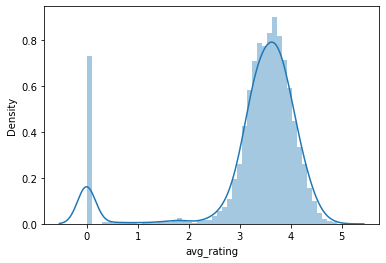

In [27]:
sns.distplot(df_rate['avg_rating'])


# Top 20 restaurant chains in Bengaluru by outlets:

In [28]:
top_chain=df['name'].value_counts()[:20]
top_chain

Cafe Coffee Day      89
Onesta               85
Empire Restaurant    71
Kanti Sweets         68
Five Star Chicken    68
Just Bake            68
Petoo                64
Baskin Robbins       63
Pizza Hut            62
Polar Bear           61
KFC                  60
Domino's Pizza       60
Sweet Truth          60
Beijing Bites        60
Subway               59
Smoor                59
McDonald's           59
Faasos               57
Burger King          55
Keventers            54
Name: name, dtype: int64

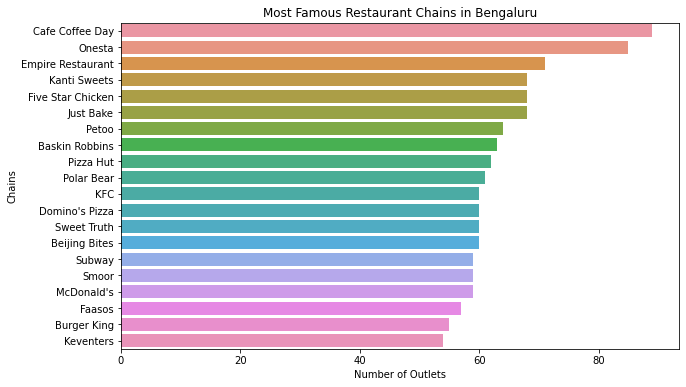

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(y=top_chain.index,x=top_chain)
plt.title("Most Famous Restaurant Chains in Bengaluru")
plt.xlabel("Number of Outlets")
plt.ylabel("Chains")
plt.show()

# Restaurants not accepting online orders:

In [30]:
x=df['online_order'].value_counts()
x

Yes    28308
No     15634
Name: online_order, dtype: int64

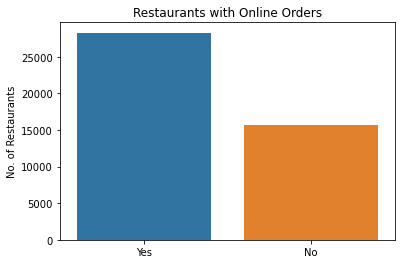

In [31]:
sns.barplot(x=df['online_order'].value_counts().index,y=df['online_order'].value_counts())
plt.title('Restaurants with Online Orders')
plt.ylabel("No. of Restaurants")
plt.show()

# Percentage of restaurants not accepting online orders:

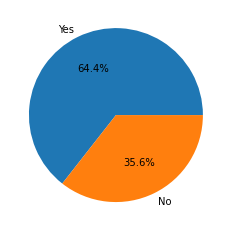

In [34]:
plt.pie(df['online_order'].value_counts(), labels=['Yes','No'], autopct='%0.1f%%')
plt.show()

# Percentage of restaurants facilitating table booking:

In [35]:
y=df['book_table'].value_counts()
y

No     37509
Yes     6433
Name: book_table, dtype: int64

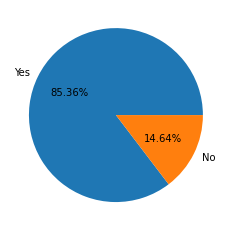

In [37]:
plt.pie(df['book_table'].value_counts(), labels=['Yes','No'], autopct='%0.2f%%')
plt.show()

# Indepth analysis of restaurant types:

In [38]:
df['rest_type'].isnull().sum()

151

In [39]:
df.dropna(axis=0,subset=['rest_type'],inplace=True)

In [40]:
df['rest_type'].isnull().sum()

0

In [41]:
df.shape

(43791, 17)

Number of unique Restaurant types-

In [42]:
df['rest_type'].nunique()

87

Finding top 20 Restaurants types-

In [43]:
df['rest_type'].value_counts()[:20]

Quick Bites                   15073
Casual Dining                  9923
Cafe                           3527
Dessert Parlor                 1939
Delivery                       1791
Takeaway, Delivery             1472
Casual Dining, Bar             1141
Bakery                          775
Beverage Shop                   704
Bar                             661
Food Court                      526
Bar, Casual Dining              420
Lounge                          396
Pub                             356
Sweet Shop                      351
Fine Dining                     343
Casual Dining, Cafe             319
Pub, Casual Dining              255
Beverage Shop, Quick Bites      244
Bakery, Quick Bites             234
Name: rest_type, dtype: int64

In [44]:
df['rest_type'].value_counts().nlargest(20)

Quick Bites                   15073
Casual Dining                  9923
Cafe                           3527
Dessert Parlor                 1939
Delivery                       1791
Takeaway, Delivery             1472
Casual Dining, Bar             1141
Bakery                          775
Beverage Shop                   704
Bar                             661
Food Court                      526
Bar, Casual Dining              420
Lounge                          396
Pub                             356
Sweet Shop                      351
Fine Dining                     343
Casual Dining, Cafe             319
Pub, Casual Dining              255
Beverage Shop, Quick Bites      244
Bakery, Quick Bites             234
Name: rest_type, dtype: int64

<AxesSubplot:>

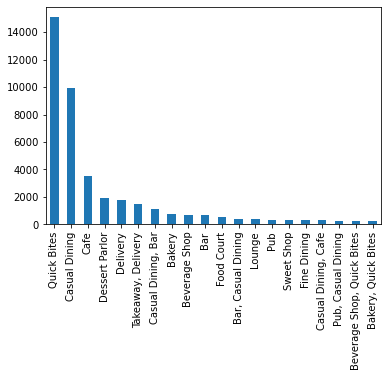

In [46]:
df['rest_type'].value_counts().nlargest(20).plot.bar()

# Highest voted restaurants in Bengaluru:

<AxesSubplot:xlabel='name'>

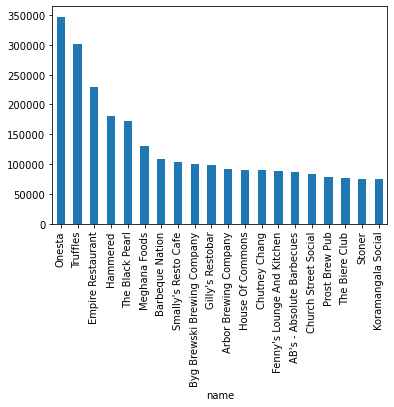

In [47]:
df.groupby("name")['votes'].sum().nlargest(20).plot.bar()

# Total Restaurants at different locations of Bengaluru:

In [50]:
df.loc[[0,456]]   # This command has been run to show that not every row in our dataset is a unique restaurant.

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
456,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Delivery,Banashankari


In [51]:
restaurant = []
location = []
for key, location_df in df.groupby('location'): # groupby returns keys and their corresponding dataframes(location_df)
    location.append(key)
    restaurant.append(location_df['name'].nunique())
    
print(restaurant)
print(location)

[578, 238, 150, 361, 195, 72, 281, 60, 110, 152, 31, 2, 55, 22, 37, 47, 83, 16, 46, 515, 147, 31, 551, 5, 54, 12, 37, 466, 13, 398, 15, 310, 75, 9, 51, 206, 135, 10, 1, 7, 133, 9, 21, 110, 252, 138, 134, 33, 69, 2, 53, 84, 16, 64, 207, 520, 9, 1, 90, 226, 7, 121, 9, 1, 43, 30, 178, 2, 16, 74, 70, 28, 41, 30, 12, 270, 46, 55, 34, 21, 34, 60, 100, 8, 34, 44, 51, 3, 633, 40, 3, 64]
['BTM', 'Banashankari', 'Banaswadi', 'Bannerghatta Road', 'Basavanagudi', 'Basaveshwara Nagar', 'Bellandur', 'Bommanahalli', 'Brigade Road', 'Brookefield', 'CV Raman Nagar', 'Central Bangalore', 'Church Street', 'City Market', 'Commercial Street', 'Cunningham Road', 'Domlur', 'East Bangalore', 'Ejipura', 'Electronic City', 'Frazer Town', 'HBR Layout', 'HSR', 'Hebbal', 'Hennur', 'Hosur Road', 'ITPL Main Road, Whitefield', 'Indiranagar', 'Infantry Road', 'JP Nagar', 'Jalahalli', 'Jayanagar', 'Jeevan Bhima Nagar', 'KR Puram', 'Kaggadasapura', 'Kalyan Nagar', 'Kammanahalli', 'Kanakapura Road', 'Kengeri', 'Koramanga

In [52]:
df_total = pd.DataFrame(zip(location,restaurant), columns=['Location','Number of Restaurants'])
df_total.head()

,Location,Number of Restaurants
0,BTM,578
1,Banashankari,238
2,Banaswadi,150
3,Bannerghatta Road,361
4,Basavanagudi,195


Making Location column as our index so that we can fetch the information directly by location name -

In [53]:
df_total.set_index("Location", inplace=True)
df_total.head()

,Number of Restaurants
Location,
BTM,578
Banashankari,238
Banaswadi,150
Bannerghatta Road,361
Basavanagudi,195


In [54]:
df_total.sort_values(by='Number of Restaurants', ascending=False, inplace=True)
df_total.head()

,Number of Restaurants
Location,
Whitefield,633
BTM,578
HSR,551
Marathahalli,520
Electronic City,515


In [55]:
df_total.loc['HSR','Number of Restaurants']

551

<AxesSubplot:xlabel='Location'>

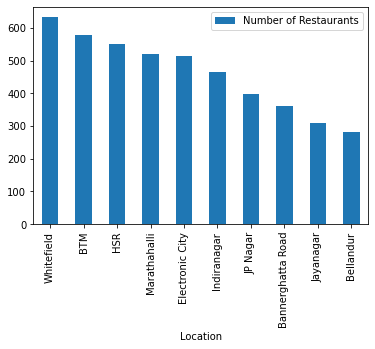

In [56]:
df_total.head(10).plot.bar()

# Top 10 cuisines of Bengaluru restaurants:

In [57]:
cuisines = df['cuisines'].value_counts()[0:10]

<AxesSubplot:>

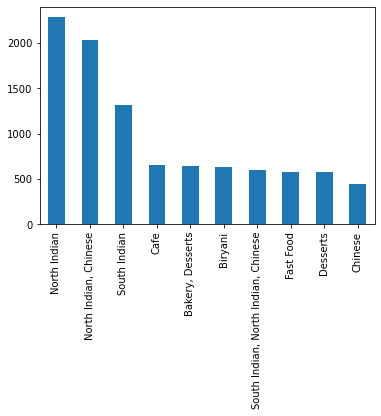

In [59]:
df['cuisines'].value_counts()[0:10].plot.bar()

# Analyse 'approx cost of 2 people' feature:

In [60]:
df['approx_cost(for two people)'].isnull().sum()

250

In [61]:
df.dropna(axis=0, subset=['approx_cost(for two people)'], inplace=True)

In [62]:
df['approx_cost(for two people)'].dtype

dtype('O')

In [63]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [64]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x:x.replace(',',''))

In [65]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(int)

<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='Density'>

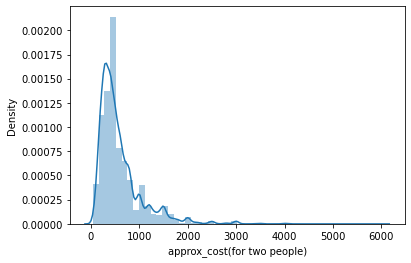

In [66]:
sns.distplot(df['approx_cost(for two people)'])    #Conclusion: About 60% of the Restaurants are affordable in Bengaluru

# Analyse 'Approx cost of 2 people' vs  'Rating':

<AxesSubplot:xlabel='rate', ylabel='approx_cost(for two people)'>

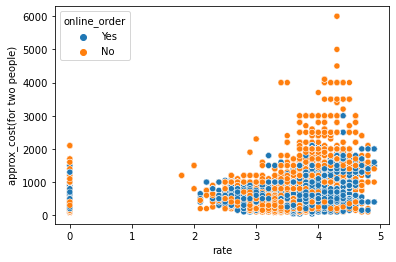

In [67]:
sns.scatterplot(x=df['rate'], y=df['approx_cost(for two people)'], hue=df['online_order'])

Conclusion: Highest rated Restaurants with online order facility are also affordable

# Analyse if there is a difference between votes of restaurants accepting and not accepting online orders:

<AxesSubplot:xlabel='online_order', ylabel='votes'>

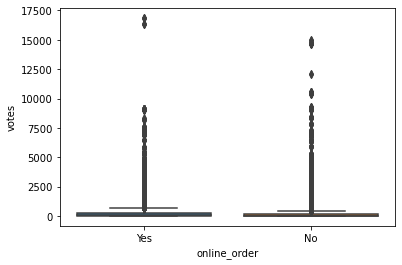

In [68]:
sns.boxplot(x='online_order',y='votes',data=df)

It is hard to draw any conclusion from the above graph so we will build an interactive boxplot using plotly

In [69]:
trace=go.Box(x=df['online_order'],y=df['votes'])
iplot([trace])   ## plotly graphs are not visible on Github

# Analyse if there is a difference between price of Restaurants accepting and not accepting online orders:

<AxesSubplot:xlabel='online_order', ylabel='approx_cost(for two people)'>

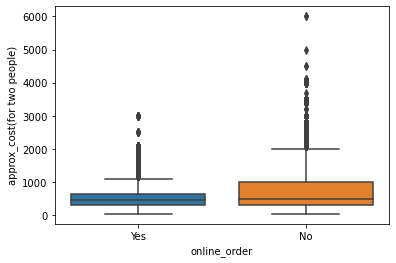

In [70]:
sns.boxplot(x=df['online_order'], y=df['approx_cost(for two people)'])

# Most expensive restaurant in Bengaluru:

In [72]:
df[df['approx_cost(for two people)'] == df['approx_cost(for two people)'].max()]['name']

19139    Le Cirque Signature - The Leela Palace
45618    Le Cirque Signature - The Leela Palace
Name: name, dtype: object

# Top 10 most and least expensive restaurants:

In [73]:
df1 = df.copy()

In [74]:
df1.set_index('name', inplace=True)

Most Expensive-

In [75]:
df1['approx_cost(for two people)'].nlargest(10)

name
Le Cirque Signature - The Leela Palace    6000
Le Cirque Signature - The Leela Palace    6000
Royal Afghan - ITC Windsor                5000
Malties - Radisson Blu                    4500
Malties - Radisson Blu                    4500
La Brasserie - Le Meridien                4100
La Brasserie - Le Meridien                4100
La Brasserie - Le Meridien                4100
La Brasserie - Le Meridien                4100
Alba - JW Marriott Bengaluru              4000
Name: approx_cost(for two people), dtype: int32

<AxesSubplot:xlabel='name'>

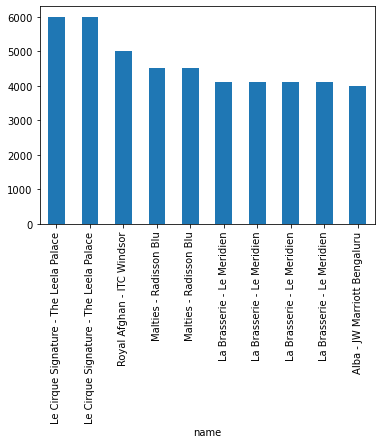

In [76]:
df1['approx_cost(for two people)'].nlargest(10).plot.bar()

Least Expensive-

In [77]:
df1['approx_cost(for two people)'].nsmallest(10)

name
Srinidhi Sagar Food Line    40
Srinidhi Sagar Food Line    40
Srinidhi Sagar Food Line    40
Srinidhi Sagar              40
Srinidhi Sagar Food Line    40
Srinidhi Sagar Deluxe       40
Srinidhi Sagar Deluxe       40
Srinidhi Sagar              40
Savera Cafe                 50
Savera Cafe                 50
Name: approx_cost(for two people), dtype: int32

<AxesSubplot:xlabel='name'>

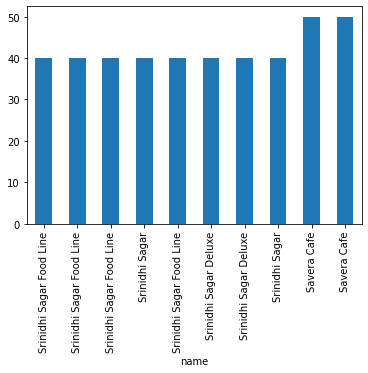

In [78]:
df1['approx_cost(for two people)'].nsmallest(10).plot.bar()

# Total number of restaurants having good rating(> 4) and are affordable too(<=500):

In [79]:
df_afford = df[(df['rate'] > 4) & (df['approx_cost(for two people)'] <= 500)]
df_afford.shape

(2436, 17)

In [80]:
df_afford['name'].nunique()

372

# Total number of affordable restaurants having good rating in all the locations of Bengaluru:

In [81]:
location = []
total = []
for key,location_df in df_afford.groupby("location"):
    location.append(key)
    total.append(location_df['name'].nunique())
    

In [82]:
location_df = pd.DataFrame(zip(location,total), columns=['Location','No. Of affordable restaurants'])
location_df.head(10)

,Location,No. Of affordable restaurants
0,BTM,28
1,Banashankari,16
2,Banaswadi,1
3,Bannerghatta Road,9
4,Basavanagudi,24
5,Basaveshwara Nagar,2
6,Bellandur,10
7,Brigade Road,6
8,Brookefield,9
9,Church Street,3


# Find the best budget and good rated restaurants in any location of Bengaluru according to Restaurant type:

In [83]:
names = []
def return_best(location,cuisine_type):
    new_df = df[(df['location']==location) & (df['rest_type']==cuisine_type) & (df['rate'] > 4) & (df['approx_cost(for two people)'] <= 500)]
    names.append(new_df['name'].unique())
    return names

At BTM location the best budget and good rated 'Quick Bites' type restaurants are-

In [84]:
return_best('BTM','Quick Bites')

[array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
        'Yum In My Tum', 'Chaatimes', "Muthashy's", 'Swad Punjab Da',
        'Hungry Lee', "Domino's Pizza", 'Roti Wala', 'Andhra Kitchen'],
       dtype=object)]

# Top foodie areas of Bengaluru by number of restaurants:

In [85]:
df.groupby('location')['name'].nunique().nlargest(20)

location
Whitefield               631
BTM                      578
HSR                      548
Marathahalli             518
Electronic City          514
Indiranagar              462
JP Nagar                 398
Bannerghatta Road        360
Jayanagar                310
Bellandur                281
Sarjapur Road            269
Koramangala 5th Block    249
Banashankari             238
New BEL Road             226
Malleshwaram             207
Kalyan Nagar             206
Basavanagudi             195
Rajajinagar              178
Brookefield              152
Banaswadi                147
Name: name, dtype: int64

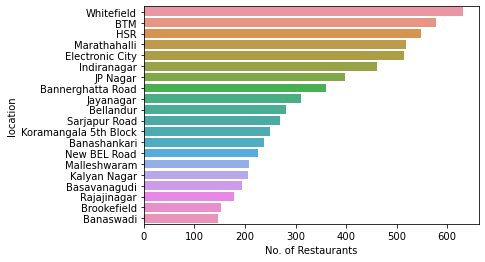

In [86]:
sns.barplot(df.groupby('location')['name'].nunique().nlargest(20),df.groupby('location')['name'].nunique().nlargest(20).index)
plt.xlabel('No. of Restaurants')
plt.show()

# Geographical analysis:

In [87]:
locations = pd.DataFrame(df['location'].unique(), columns=['name'])

In [88]:
locations.head()

,name
0,Banashankari
1,Basavanagudi
2,Mysore Road
3,Jayanagar
4,Kumaraswamy Layout


In [89]:
locations.shape

(92, 1)

# Find latitude and longitude of each location:

In [90]:
# Installing library used for geographical analysis
#!pip install geopy

In [91]:
from geopy.geocoders import Nominatim      # Open street map

In [92]:
geolocator = Nominatim(user_agent = 'app')    # establishing connection 
#using Nominatim object we can find address, latitudes and longitudes by calling some of the functions of this class.

In [93]:
lat_lon=[]
for location in locations['name']:
    i=geolocator.geocode(location)
    if i is None:
        lat_lon.append(np.nan)
    else:
        loc=(i.latitude,i.longitude)
        lat_lon.append(loc)
        

In [94]:
locations['lat_lon']=lat_lon

In [95]:
locations.head()

,name,lat_lon
0,Banashankari,"(15.8876779, 75.7046777)"
1,Basavanagudi,"(12.9417261, 77.5755021)"
2,Mysore Road,"(12.3872141, 76.6669626)"
3,Jayanagar,"(27.64392675, 83.05280519687284)"
4,Kumaraswamy Layout,"(12.9081487, 77.5553179)"


How many Restaurants in each location-

In [96]:
df.groupby('location')['name'].nunique()

location
BTM                  578
Banashankari         238
Banaswadi            147
Bannerghatta Road    360
Basavanagudi         195
                    ... 
West Bangalore         3
Whitefield           631
Wilson Garden         40
Yelahanka              2
Yeshwantpur           64
Name: name, Length: 92, dtype: int64

In [97]:
df1=df.groupby('location')['name'].nunique().to_frame().reset_index()
df1.columns=['name','Count']
df1.head()

,name,Count
0,BTM,578
1,Banashankari,238
2,Banaswadi,147
3,Bannerghatta Road,360
4,Basavanagudi,195


In [98]:
df1.shape

(92, 2)

Merge both the dataframes to get locations, positions and count of restaurants in one dataframe

In [99]:
final_df=df1.merge(locations,on='name',how='inner')
final_df.head(10)

,name,Count,lat_lon
0,BTM,578,"(45.95485055, -112.49659530324134)"
1,Banashankari,238,"(15.8876779, 75.7046777)"
2,Banaswadi,147,"(13.0141618, 77.6518539)"
3,Bannerghatta Road,360,"(12.8870547, 77.5969483)"
4,Basavanagudi,195,"(12.9417261, 77.5755021)"
5,Basaveshwara Nagar,70,"(12.2949193, 76.6155101)"
6,Bellandur,281,"(12.93577245, 77.66676103753434)"
7,Bommanahalli,60,"(12.9089453, 77.6239038)"
8,Brigade Road,110,"(40.28745, -76.964526)"
9,Brookefield,152,"(33.5935063, -79.0345627)"


In [100]:
final_df.shape

(92, 3)

Checking for null values in final_df

In [101]:
final_df.isnull().sum()

name       0
Count      0
lat_lon    1
dtype: int64

Drop null values from final_df

In [102]:
final_df.dropna(axis=0, inplace=True)

Segregate latitude and longitude of each location

In [103]:
np.array(final_df['lat_lon'])

array([(45.95485055, -112.49659530324134), (15.8876779, 75.7046777),
       (13.0141618, 77.6518539), (12.8870547, 77.5969483),
       (12.9417261, 77.5755021), (12.2949193, 76.6155101),
       (12.93577245, 77.66676103753434), (12.9089453, 77.6239038),
       (40.28745, -76.964526), (33.5935063, -79.0345627),
       (17.2510682, 80.1651978), (13.0101286, 77.5548006),
       (40.7142453, -74.0084984), (39.76880625, -86.15345077251979),
       (51.5228207, -0.0776446), (31.89376, -88.066644),
       (12.9624669, 77.6381958), (12.9845687, 77.73766474151809),
       (12.945245, 77.6269144), (-8.6368007, 115.2147012),
       (12.996845, 77.6130165), (13.0358698, 77.6323597),
       (18.1475, 41.538889), (13.0382184, 77.5919),
       (13.0258087, 77.6305067), (12.773175, 77.7831871),
       (12.9805381, 77.7273032), (12.9732913, 77.6404672),
       (34.977289, -78.974578), (12.2655944, 76.6465404),
       (13.6510577, 77.4305219), (27.64392675, 83.05280519687284),
       (12.9678074, 77.656

In [104]:
print(*np.array(final_df['lat_lon']))

(45.95485055, -112.49659530324134) (15.8876779, 75.7046777) (13.0141618, 77.6518539) (12.8870547, 77.5969483) (12.9417261, 77.5755021) (12.2949193, 76.6155101) (12.93577245, 77.66676103753434) (12.9089453, 77.6239038) (40.28745, -76.964526) (33.5935063, -79.0345627) (17.2510682, 80.1651978) (13.0101286, 77.5548006) (40.7142453, -74.0084984) (39.76880625, -86.15345077251979) (51.5228207, -0.0776446) (31.89376, -88.066644) (12.9624669, 77.6381958) (12.9845687, 77.73766474151809) (12.945245, 77.6269144) (-8.6368007, 115.2147012) (12.996845, 77.6130165) (13.0358698, 77.6323597) (18.1475, 41.538889) (13.0382184, 77.5919) (13.0258087, 77.6305067) (12.773175, 77.7831871) (12.9805381, 77.7273032) (12.9732913, 77.6404672) (34.977289, -78.974578) (12.2655944, 76.6465404) (13.6510577, 77.4305219) (27.64392675, 83.05280519687284) (12.9678074, 77.6568367) (13.007516, 77.695935) (12.9846713, 77.6790908) (13.0221416, 77.6403368) (13.0093455, 77.6377094) (12.5442176, 77.4213833) (12.9176571, 77.483756

In [105]:
lat,lon = zip(*np.array(final_df['lat_lon']))

In [106]:
print(lat)           #latitudes of each location

(45.95485055, 15.8876779, 13.0141618, 12.8870547, 12.9417261, 12.2949193, 12.93577245, 12.9089453, 40.28745, 33.5935063, 17.2510682, 13.0101286, 40.7142453, 39.76880625, 51.5228207, 31.89376, 12.9624669, 12.9845687, 12.945245, -8.6368007, 12.996845, 13.0358698, 18.1475, 13.0382184, 13.0258087, 12.773175, 12.9805381, 12.9732913, 34.977289, 12.2655944, 13.6510577, 27.64392675, 12.9678074, 13.007516, 12.9846713, 13.0221416, 13.0093455, 12.5442176, 12.9176571, 13.2923988, 12.92769875, 12.9243509, 12.9271867, 12.93433385, 12.9343774, 12.9400321, 12.9302645, 12.9417812, 12.9081487, 12.957998, 40.7652844, 29.4534927, 12.945048, 1.2847055, 13.0027353, 12.9552572, 12.3872141, 12.95961755, 13.2227, 13.0343483, 12.9767936, 41.528338, 13.1979975, 13.0329419, 13.0227204, 52.7772638, 12.9882338, 12.9274413, 5.4173857, 40.5758225, 15.8782951, 18.4900796, 30.1915796, 38.7801076, 12.9242381, 12.9931876, 12.983117, 18.5322493, 12.9172247, 33.1193914, 12.973936, 12.9778793, 12.9055682, 12.9414662, 12.988

In [107]:
final_df['lat'] = lat
final_df['lon'] = lon

In [108]:
final_df.head(10)

,name,Count,lat_lon,lat,lon
0,BTM,578,"(45.95485055, -112.49659530324134)",45.954851,-112.496595
1,Banashankari,238,"(15.8876779, 75.7046777)",15.887678,75.704678
2,Banaswadi,147,"(13.0141618, 77.6518539)",13.014162,77.651854
3,Bannerghatta Road,360,"(12.8870547, 77.5969483)",12.887055,77.596948
4,Basavanagudi,195,"(12.9417261, 77.5755021)",12.941726,77.575502
5,Basaveshwara Nagar,70,"(12.2949193, 76.6155101)",12.294919,76.615510
6,Bellandur,281,"(12.93577245, 77.66676103753434)",12.935772,77.666761
7,Bommanahalli,60,"(12.9089453, 77.6239038)",12.908945,77.623904
8,Brigade Road,110,"(40.28745, -76.964526)",40.287450,-76.964526
9,Brookefield,152,"(33.5935063, -79.0345627)",33.593506,-79.034563


Dropping lat_lon column using:  final_df.drop('lat_lon',axis=1,inplace=True)

In [109]:
final_df.head()

,name,Count,lat_lon,lat,lon
0,BTM,578,"(45.95485055, -112.49659530324134)",45.954851,-112.496595
1,Banashankari,238,"(15.8876779, 75.7046777)",15.887678,75.704678
2,Banaswadi,147,"(13.0141618, 77.6518539)",13.014162,77.651854
3,Bannerghatta Road,360,"(12.8870547, 77.5969483)",12.887055,77.596948
4,Basavanagudi,195,"(12.9417261, 77.5755021)",12.941726,77.575502


# Plot basemap of Bengaluru:

In [110]:
# !pip install folium, library to create maps
import folium
from folium.plugins import HeatMap

Creating Basemap-

In [111]:
def generatebasemap(default_location=[12.93577245, 77.66676103753434],default_zoom_start=12):
    basemap=folium.Map(location=default_location,zoom_start=default_zoom_start)
    return basemap

In [112]:
basemap=generatebasemap()

In [113]:
basemap

# Plotting Heatmap of Bengaluru Restaurants:

In [114]:
HeatMap(final_df[['lat','lon','Count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [115]:
basemap

# Heatmap of north Indian cuisine type restaurants in Bengaluru:

In [116]:
df1 = df[df['cuisines']=='North Indian']
df1.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
50,https://www.zomato.com/bangalore/petoo-banasha...,"276, Ground Floor, 100 Feet Outer Ring Road, B...",Petoo,No,No,3.7,21,+91 8026893211,Banashankari,Quick Bites,NaN,North Indian,450,"[('Rated 2.0', 'RATED\n This is a neatly made...",[],Delivery,Banashankari
72,https://www.zomato.com/bangalore/spicy-tandoor...,"Opposite ICICi Bank, Hanuman Nagar, Banashanka...",Spicy Tandoor,No,No,0.0,0,+91 8050884222,Banashankari,Quick Bites,NaN,North Indian,150,"[('Rated 4.0', 'RATED\n cost for chicken roll...",[],Delivery,Banashankari
87,https://www.zomato.com/bangalore/krishna-sagar...,"38, 22nd Main, 22nd Cross, Opposite BDA, 2nd S...",Krishna Sagar,No,No,3.5,31,+91 8892752997\r\n+91 7204780429,Banashankari,Quick Bites,NaN,North Indian,200,"[('Rated 1.0', 'RATED\n Worst experience with...",[],Delivery,Banashankari
94,https://www.zomato.com/bangalore/nandhini-delu...,"304, Opposite Apollo Public School, 100 Feet R...",Nandhini Deluxe,No,No,2.6,283,080 26890011\r\n080 26890033,Banashankari,Casual Dining,"Biryani, Chicken Guntur, Thali, Buttermilk, Ma...",North Indian,600,"[('Rated 3.0', 'RATED\n Ididnt like much.\n\n...",[],Delivery,Banashankari


In [117]:
df_count = df1['location'].value_counts().to_frame().reset_index()
df_count.columns = ['location','no. of restaurants']
df_count.head()

,location,no. of restaurants
0,BTM,262
1,Whitefield,145
2,JP Nagar,135
3,Bellandur,131
4,HSR,117


In [118]:
df_count.shape

(63, 2)

In [119]:
lat_lon = []
for location in df_count['location']:
    i = geolocator.geocode(location)
    if i is None:
        lat_lon.append(np.nan)
    else:
        lat_lon.append((i.latitude,i.longitude))

In [120]:
df_count['lat_lon'] = lat_lon

In [121]:
df_count.head()

,location,no. of restaurants,lat_lon
0,BTM,262,"(45.95485055, -112.49659530324134)"
1,Whitefield,145,"(44.3730577, -71.6118577)"
2,JP Nagar,135,"(12.2655944, 76.6465404)"
3,Bellandur,131,"(12.93577245, 77.66676103753434)"
4,HSR,117,"(18.1475, 41.538889)"


Checking for null values-

In [122]:
df_count.isnull().sum()

location              0
no. of restaurants    0
lat_lon               0
dtype: int64

In [123]:
lat_lon = df_count['lat_lon'].tolist()

In [124]:
lat,lon = zip(*lat_lon)

In [125]:
df_count['lat'] = lat
df_count['lon'] = lon

In [126]:
df_count.drop('lat_lon', axis=1, inplace=True)
df_count.head()

,location,no. of restaurants,lat,lon
0,BTM,262,45.954851,-112.496595
1,Whitefield,145,44.373058,-71.611858
2,JP Nagar,135,12.265594,76.646540
3,Bellandur,131,12.935772,77.666761
4,HSR,117,18.147500,41.538889


In [127]:
basemap = generatebasemap()
HeatMap(df_count[['lat','lon','no. of restaurants']].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [128]:
basemap

# Casual dining restaurant chains in Bengaluru having most number of outlets:

In [129]:
df.groupby(['rest_type','name']).agg('count')       # Note that the rest_type and name have become index in the below df

url  address  online_order  \
rest_type          name                                                      
Bakery             7th Heaven                     2        2             2   
                   A Little For Love              1        1             1   
                   Adarsh Bakery                  2        2             2   
                   Adi's Cake N Cafe              2        2             2   
                   Albert Bakery                  1        1             1   
...                                             ...      ...           ...   
Takeaway, Delivery Yumlane                        2        2             2   
                   Yumme Veg                      2        2             2   
                   Zamorin's Mappillah Biryani    1        1             1   
                   Zu's Doner Kebaps              1        1             1   
                   eat.fit                        2        2             2   

                                                book_table  rate  votes  \
rest_type          name                                                   
Bakery             7th Heaven                            2     2      2   
                   A Little For Love                     1     1      1   
                   Adarsh Bakery                         2     2      2   
                   Adi's Cake N Cafe                     2     2      2   
                   Albert Bakery                         1     1      1   
...                                                    ...   ...    ...   
Takeaway, Delivery Yumlane                               2     2      2   
                   Yumme Veg                             2     2      2   
                   Zamorin's Mappillah Biryani           1     1      1   
                   Zu's Doner Kebaps                     1     1      1   
                   eat.fit                               2     2      2   

                                                phone  location  dish_liked  \
rest_type          name                                                       
Bakery             7th Heaven                       2         2           0   
                   A Little For Love                1         1           0   
                   Adarsh Bakery                    2         2           0   
                   Adi's Cake N Cafe                2         2           0   
                   Albert Bakery                    1         1           1   
...                                               ...       ...         ...   
Takeaway, Delivery Yumlane                          2         2           0   
                   Yumme Veg                        2         2           0   
                   Zamorin's Mappillah Biryani      1         1           0   
                   Zu's Doner Kebaps                0         1           0   
                   eat.fit                          2         2           0   

                                                cuisines  \
rest_type          name                                    
Bakery             7th Heaven                          2   
                   A Little For Love                   1   
                   Adarsh Bakery                       2   
                   Adi's Cake N Cafe                   2   
                   Albert Bakery                       1   
...                                                  ...   
Takeaway, Delivery Yumlane                             2   
                   Yumme Veg                           2   
                   Zamorin's Mappillah Biryani         1   
                   Zu's Doner Kebaps                   1   
                   eat.fit                             2   

                                                approx_cost(for two people)  \
rest_type          name                                                       
Bakery             7th Heaven                                             2   
           

In [130]:
df1 = df.groupby(['rest_type','name']).agg('count').sort_values(by="url", ascending=False)
df1


url  address  online_order  \
rest_type           name                                              
Cafe                Cafe Coffee Day       89       89            89   
Casual Dining, Cafe Onesta                85       85            85   
Quick Bites         Five Star Chicken     67       67            67   
                    Domino's Pizza        60       60            60   
                    McDonald's            59       59            59   
...                                      ...      ...           ...   
                    New Students Corner    1        1             1   
Dessert Parlor      Mr Gola                1        1             1   
Casual Dining       Parijatha Paradise     1        1             1   
                    Parijatha Fish Land    1        1             1   
Delivery            SaJuSo                 1        1             1   

                                         book_table  rate  votes  phone  \
rest_type           name                                                  
Cafe                Cafe Coffee Day              89    89     89     86   
Casual Dining, Cafe Onesta                       85    85     85     85   
Quick Bites         Five Star Chicken            67    67     67     62   
                    Domino's Pizza               60    60     60     60   
                    McDonald's                   59    59     59     59   
...                                             ...   ...    ...    ...   
                    New Students Corner           1     1      1      1   
Dessert Parlor      Mr Gola                       1     1      1      1   
Casual Dining       Parijatha Paradise            1     1      1      1   
                    Parijatha Fish Land           1     1      1      1   
Delivery            SaJuSo                        1     1      1      1   

                                         location  dish_liked  cuisines  \
rest_type           name                                                  
Cafe                Cafe Coffee Day            89          31        89   
Casual Dining, Cafe Onesta                     85          85        85   
Quick Bites         Five Star Chicken          67          10        67   
                    Domino's Pizza             60          55        60   
                    McDonald's                 59          57        59   
...                                           ...         ...       ...   
                    New Students Corner         1           0         1   
Dessert Parlor      Mr Gola                     1           0         1   
Casual Dining       Parijatha Paradise          1           0         1   
                    Parijatha Fish Land         1           0         1   
Delivery            SaJuSo                      1           0         1   

                                         approx_cost(for two people)  \
rest_type           name                                               
Cafe                Cafe Coffee Day                               89   
Casual Dining, Cafe Onesta                                        85   
Quick Bites         Five Star Chicken                             67   
                    Domino's Pizza                                60   
                    McDonald's                                    59   
...                                                              ...   
                    New Students Corner                            1   
Dessert Parlor      Mr Gola                                        1   
Casual Dining       Parijatha Paradise                             1   
                    Parijatha Fish Land                            1   
Delivery            SaJuSo                                         1   

                                         reviews_list  menu_item  \
rest_type           name                                           
Cafe                Cafe Coffee Day                89         89   
Casual Dining, Cafe Ones

In [131]:
df1.loc['Casual Dining']

,url,address,online_order,book_table,rate,votes,phone,location,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
name,,,,,,,,,,,,,,,
Empire Restaurant,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58
Beijing Bites,48,48,48,48,48,48,48,48,42,48,48,48,48,48,48
Mani's Dum Biryani,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47
Chung Wah,46,46,46,46,46,46,46,46,45,46,46,46,46,46,46
Oye Amritsar,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Prakash Cafe,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1
Pink Pepper,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1
Patels Inn,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1


In [132]:
df1.loc['Casual Dining'][['url']].reset_index().rename(columns={'url':'count'})

,name,count
0,Empire Restaurant,58
1,Beijing Bites,48
2,Mani's Dum Biryani,47
3,Chung Wah,46
4,Oye Amritsar,41
...,...,...
1634,Prakash Cafe,1
1635,Pink Pepper,1
1636,Patels Inn,1
1637,Parijatha Paradise,1


The top 5 Casual Dining type Restaurants in Bengaluru are-

In [133]:
df1.loc['Casual Dining'][['url']].reset_index().rename(columns={'url':'count'})['name'][:5]

0     Empire Restaurant
1         Beijing Bites
2    Mani's Dum Biryani
3             Chung Wah
4          Oye Amritsar
Name: name, dtype: object

# Average Rating of all the Restaurant Chains according to type:

In [134]:
df.groupby(['rest_type','name'])['rate'].mean().to_frame().rename(columns={'rate':'average rating'})

average rating
rest_type          name                                       
Bakery             7th Heaven                             3.60
                   A Little For Love                      3.40
                   Adarsh Bakery                          3.10
                   Adi's Cake N Cafe                      3.30
                   Albert Bakery                          4.30
...                                                        ...
Takeaway, Delivery Yumlane                                3.15
                   Yumme Veg                              3.60
                   Zamorin's Mappillah Biryani            0.00
                   Zu's Doner Kebaps                      3.70
                   eat.fit                                0.00

[7712 rows x 1 columns]

# Best rated casual dining type restaurant chains in Bengaluru:

In [135]:
df1 = df.groupby(['rest_type','name'])['rate'].mean().to_frame().rename(columns={'rate':'average rating'})
df1

average rating
rest_type          name                                       
Bakery             7th Heaven                             3.60
                   A Little For Love                      3.40
                   Adarsh Bakery                          3.10
                   Adi's Cake N Cafe                      3.30
                   Albert Bakery                          4.30
...                                                        ...
Takeaway, Delivery Yumlane                                3.15
                   Yumme Veg                              3.60
                   Zamorin's Mappillah Biryani            0.00
                   Zu's Doner Kebaps                      3.70
                   eat.fit                                0.00

[7712 rows x 1 columns]

In [136]:
df1.loc['Casual Dining']

,average rating
name,
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700000
1441 Pizzeria,4.100000
1722 Urban Bistro,4.100000
1947,4.021429
2 Statez,3.700000
...,...
Zhangs Classic,2.600000
Zingron,4.009091
Zodiac,3.600000


In [137]:
df1.loc['Casual Dining'].sort_values(by='average rating', ascending=False)

,average rating
name,
SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Spa Cuisine,4.900000
Punjab Grill,4.871429
The Pizza Bakery,4.800000
Flechazo,4.800000
AB's - Absolute Barbecues,4.789474
...,...
Shiv Sagar,0.000000
Crown Resto,0.000000
Sunny's,0.000000


Conclusion: 'Santa Spa Cuisine' is the best rated casual dining type restaurant chain in Bengaluru